In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

num_classes = ds_info.features["label"].num_classes
print("Number of classes:", num_classes)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.GNYZWB_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Number of classes: 5


In [3]:
IMG_SIZE = 100

def normalize_img(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return tf.cast(image, tf.float32) / 255.0, label

BATCH_SIZE = 32

train_ds = (
    ds_train
    .map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    ds_test
    .map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 594ms/step - accuracy: 0.3556 - loss: 1.4567 - val_accuracy: 0.4659 - val_loss: 1.1610
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 532ms/step - accuracy: 0.5137 - loss: 1.1507 - val_accuracy: 0.6076 - val_loss: 0.9747
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 535ms/step - accuracy: 0.6014 - loss: 1.0088 - val_accuracy: 0.6226 - val_loss: 0.9546
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 524ms/step - accuracy: 0.6684 - loss: 0.8686 - val_accuracy: 0.6812 - val_loss: 0.8062
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 85s 559ms/step - accuracy: 0.6931 - loss: 0.7889 - val_accuracy: 0.6526 - val_loss: 0.8783


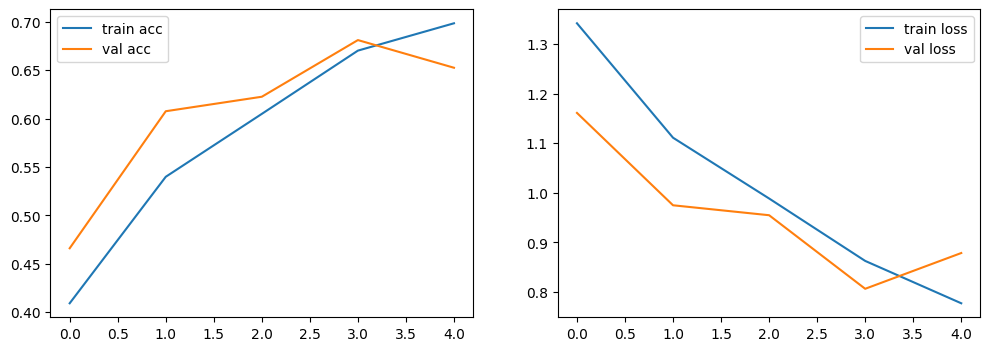

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Final Test Accuracy: {test_acc*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.6400 - loss: 0.8817
Final Test Accuracy: 65.26%
Final Test Loss: 0.8783
